# Sentiment Analysis in Python

In [1]:
#import nltk
#nltk.download('popular', halt_on_error=False)
#nltk.download('all', halt_on_error=False)

In [2]:
import pandas as pd
import re
import requests
import sys
import os
import matplotlib.pyplot as plt
#import nltk as nltk
#import nltk.corpus  
#from nltk.text import Text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

pd.set_option('display.max_colwidth', 500)

In [3]:
print(sys.version)

3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]


#### Copy files to local FS from GCP bucket

In [4]:
def get_gcs_data (bucket_name, folder_name, file_name, path_local):
    url = 'https://storage.googleapis.com/' + bucket_name + '/' + folder_name + '/' + file_name
    r = requests.get(url)
    open(path_local + '/' + file_name , 'wb').write(r.content)

In [5]:
path_books = '/home/jupyter/data/books'
path_tweets = '/home/jupyter/data/tweets'

In [6]:
bucket_name = 'msca-bdp-data-open'
folder_name = 'books'
file_name = ['2Book_2.txt']
path_local = path_books

os.makedirs(path_local, exist_ok=True)

for file in file_name:
    get_gcs_data (bucket_name = bucket_name,
                 folder_name = folder_name,
                 file_name = file,
                 path_local = path_local)
    print('Downloaded: ' + file)

Downloaded: 2Book_2.txt


In [7]:
bucket_name = 'msca-bdp-data-open'
folder_name = 'tweets'
file_name = ['positive.txt', 'negative.txt']
path_local = path_tweets

os.makedirs(path_local, exist_ok=True)

for file in file_name:
    get_gcs_data (bucket_name = bucket_name,
                 folder_name = folder_name,
                 file_name = file,
                 path_local = path_local)
    print('Downloaded: ' + file)

Downloaded: positive.txt
Downloaded: negative.txt


## Sentiment Analysis with TextBlob: Polarity and Subjectivity

__textblob.sentiments__ module contains two sentiment analysis implementations  

- PatternAnalyzer (based on the pattern library: https://www.clips.uantwerpen.be/pattern)  
- NaiveBayesAnalyzer (an NLTK classifier trained on a movie reviews corpus).

The default implementation is PatternAnalyzer, but you can override the analyzer to use NaiveBayesAnalyzer

Polarity and Subjectivity:  
- Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement  
- Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]  

In [8]:
text = '''What a federal government shutdown would mean in Chicago'''

In [9]:
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.6807460809168594, p_neg=0.31925391908314127)

In [10]:
blob = TextBlob(text)
blob.sentiment

Sentiment(polarity=-0.3125, subjectivity=0.6875)

In [11]:
text = '''Wolf experts urge UK police not to shoot escaped animal'''

In [12]:
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.6175593484868018, p_neg=0.382440651513196)

In [13]:
blob = TextBlob(text)
blob.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [14]:
text = '''A 29-year-old man was shot Friday evening on the South Side.'''

In [15]:
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.7079960513228761, p_neg=0.2920039486771243)

In [16]:
blob = TextBlob(text)
blob.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [17]:
text = '''Three teenagers have been charged with felony robbery after they were 
taken into custody in connection with a string of robberies from the Near North Side to Kenwood.'''

In [18]:
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.9002488373268706, p_neg=0.09975116267312774)

In [19]:
blob = TextBlob(text)
blob.sentiment

Sentiment(polarity=0.1, subjectivity=0.4)

In [20]:
text = '''American and Southwest joined United Airlines in reporting expectation-beating earnings 
and unveiling expansion plans.  But investors, fearing that more flights might lead to a fare war, 
pounded airline stocks for a second day even as American Airlines signaled that higher fuel costs 
will probably force it to raise fares..'''

In [21]:
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.9141571646860674, p_neg=0.0858428353139356)

In [22]:
blob = TextBlob(text)
blob.sentiment

Sentiment(polarity=0.15, subjectivity=0.2)

In [23]:
text = '''The gorgeous Giulia Quadrifoglio seduces the soul and sears the 
senses with a beautiful balance of aggression and finesse. 
Alfa flaunts its racing pedigree with the four-leaf-clover 
badge displayed on the Giulia’s shapely flanks. 
Its Ferrari-derived twin-turbo V-6 sings a sinister tune, 
belting out 505 horsepower. Its clever, communicative chassis can 
conquer a race course with unfiltered ferocity or coolly traverse 
the tarmac without commotion. An excellent eight-speed automatic 
transmission and rear-wheel drive are standard; sadly, 
a manual gearbox is missing. Alfa Romeo’s past and present 
reliability issues also remain an unknown quantity. 
Still, the Giulia Quadrifoglio, or QF, is an exotic sports sedan 
that sets a new benchmark for the genre—which is why it made our list of 10Best Cars for 2018.'''

In [24]:
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.991948748693045, p_neg=0.008051251306939424)

In [25]:
blob = TextBlob(text)
blob.sentiment

Sentiment(polarity=0.15378787878787878, subjectivity=0.6241341991341992)

In [26]:
text = '''My husband ordered a fruit arrangement for me for Valentine's Day. 
He had planned on taking me to the movies with two free tickets he was promised with a 
promotion you had been advertising. My husband was unaware that these tickets came via email. 
However, your sales representative who took his order failed to record his email address. 
Therefore we never received the tickets. 
I have called corporate and the store manager about this. 
They seem to not be able to resolve things in a timely manner. 
Also the fruit was not the best tasting. 
Needless to say we will never be supporting your business again. 
Overall poor customer service and a very overpriced product.'''

In [27]:
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.9993862773779272, p_neg=0.0006137226220642661)

In [28]:
blob = TextBlob(text)
blob.sentiment

Sentiment(polarity=0.08636363636363636, subjectivity=0.425)

## Reading from URL
#### BeautifulSoup to clean up meta-tags 

In [29]:
url = "https://en.wikipedia.org/wiki/University_of_Chicago"

from bs4 import BeautifulSoup
import urllib.request
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page.read(), "lxml")

In [30]:
uc_wiki = (soup.get_text())
#print (type(uc_wiki))
print (uc_wiki[7170:8010]) 

nd the Hyde Park campus opened for classes on October 1, 1892.[41]  Harper worked on building up the faculty and in two years he had a faculty of 120, including eight former university or college presidents.[46]  Harper was an accomplished scholar (Semiticist) and a member of the Baptist clergy who believed that a great university should maintain the study of faith as a central focus.[47] To fulfill this commitment, he brought the Baptist seminary that had begun as an independent school "alongside" the Old University of Chicago and separated from the old school decades earlier to Morgan Park. This became the Divinity School in 1891, the first professional school at the University of Chicago.[37]: 20–22 
Harper recruited acclaimed Yale baseball and football player Amos Alonzo Stagg from the Young Men's Christian Association train


### Sentiment analysis on entire body of text might be difficult to interpret

In [31]:
blob = TextBlob(uc_wiki, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=3.4230353457466076e-183)

In [32]:
blob = TextBlob(uc_wiki)
blob.sentiment

Sentiment(polarity=0.15078493143814012, subjectivity=0.3714800046062081)

### Processing sentiment by sentences

In [33]:
b_sentences = blob.sentences
print (b_sentences[10:15])

[Sentence("[25]  Advances in chemistry led to the "radiocarbon revolution" in the carbon-14 dating of ancient life and objects."), Sentence("[26] The university research efforts include administration of Fermi National Accelerator Laboratory and Argonne National Laboratory, as well as the Marine Biological Laboratory."), Sentence("The university is also home to the University of Chicago Press, the largest university press in the United States."), Sentence("[27]
The University of Chicago's students, faculty, and staff include 97 Nobel laureates, among the highest of any university in the world."), Sentence("[28] The university's faculty members and alumni also include 10 Fields Medalists,[29] 4 Turing Award winners, 52 MacArthur Fellows,[30] 26 Marshall Scholars,[31] 53 Rhodes Scholars,[32] 27 Pulitzer Prize winners,[33] 20 National Humanities Medalists,[34] 29 living billionaire graduates,[35] and eight Olympic medalists.")]


#### NaiveBayesAnalyzer

In [34]:
blob = TextBlob(uc_wiki, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=3.4230353457466076e-183)

In [35]:
sentences = []
bSentimentClass = []
bSentimentPos = []
bSentimentNeg = []
NaiveBayesAnalyzerDF = None
NaiveBayesAnalyzerDF = pd.DataFrame(columns=['sentence' ,'classification', 'prob_positive', 'prob_negative'])

for sentence in blob.sentences:
    bSentimentClass.append(str(sentence.sentiment.classification))
    bSentimentPos.append(str(sentence.sentiment.p_pos))
    bSentimentNeg.append(str(sentence.sentiment.p_neg))
    sentences.append(str(sentence))

NaiveBayesAnalyzerDF['sentence'] = sentences
NaiveBayesAnalyzerDF['classification'] = bSentimentClass
NaiveBayesAnalyzerDF['prob_positive'] = bSentimentPos
NaiveBayesAnalyzerDF['prob_negative'] = bSentimentNeg
NaiveBayesAnalyzerDF['sentence'] = NaiveBayesAnalyzerDF['sentence'].str.replace('\n', ' ') 

NaiveBayesAnalyzerDF.head(5)

,sentence,classification,prob_positive,prob_negative
0,"University of Chicago - Wikipedia University of Chicago From Wikipedia, the free encyclopedia Jump to navigation Jump to search Private university in Chicago, Illinois The University of ChicagoLatin: Universitas ChicaginiensisMottoCrescat scientia; vita excolatur (Latin)Motto in English""Let knowledge grow from more to more; and so be human life enriched.",pos,0.9887360773913755,0.011263922608622011
1,"""[1]TypePrivate research universityEstablished1890, 1856; 132 years ago (1890, 1856)[1][2]FounderJohn D. RockefellerAccreditationHLCAcademic affiliationsAAUNAICUURASpace-grantEndowment$11.6 billion (2021)[3]PresidentA.",neg,0.22873779177239437,0.7712622082276058
2,"Paul AlivisatosProvostKa Yee Christina LeeAcademic staff2,859[4]Administrative staff15,949 (including employees of The University of Chicago Medical Center)[4]Students18,452Undergraduates7,559[1]Postgraduates10,893[1]LocationChicago, Illinois, United States41°47′23″N 87°35′59″W﻿ / ﻿41.78972°N 87.59972°W﻿ / 41.78972; -87.59972Coordinates: 41°47′23″N 87°35′59″W﻿ / ﻿41.78972°N 87.59972°W﻿ / 41.78972; -87.59972CampusLarge City,[5] 217 acres (87.8 ha) (main campus)[1]Warren Woods Ecological Field...",pos,0.9943676010497957,0.005632398950201687
3,Its main campus is located in Chicago's Hyde Park neighborhood.,pos,0.8044073650002952,0.1955926349997047
4,[9][10] The University of Chicago is consistently ranked among the best universities in the world[11][12][13][14] and it is among the most selective in the United States.,pos,0.5456988956200433,0.454301104379956


#### PatternAnalyzer

In [36]:
blob = TextBlob(uc_wiki)
blob.sentiment

Sentiment(polarity=0.15078493143814012, subjectivity=0.3714800046062081)

In [37]:
sentences = []
b_sentiment = []
b_subjectivity = []
PatternAnalyzerDF = None
PatternAnalyzerDF = pd.DataFrame(columns=['sentence' ,'sentiment', 'subjectivity'])

for sentence in blob.sentences:
    b_sentiment.append(str(sentence.sentiment.polarity))
    b_subjectivity.append(str(sentence.sentiment.subjectivity))
    sentences.append(str(sentence))    

PatternAnalyzerDF['sentence'] = sentences
PatternAnalyzerDF['sentiment'] = b_sentiment
PatternAnalyzerDF['subjectivity'] = b_subjectivity
PatternAnalyzerDF['sentence'] = PatternAnalyzerDF['sentence'].str.replace('\n', ' ') 
PatternAnalyzerDF.head(5)

,sentence,sentiment,subjectivity
0,"University of Chicago - Wikipedia University of Chicago From Wikipedia, the free encyclopedia Jump to navigation Jump to search Private university in Chicago, Illinois The University of ChicagoLatin: Universitas ChicaginiensisMottoCrescat scientia; vita excolatur (Latin)Motto in English""Let knowledge grow from more to more; and so be human life enriched.",0.2333333333333333,0.37916666666666665
1,"""[1]TypePrivate research universityEstablished1890, 1856; 132 years ago (1890, 1856)[1][2]FounderJohn D. RockefellerAccreditationHLCAcademic affiliationsAAUNAICUURASpace-grantEndowment$11.6 billion (2021)[3]PresidentA.",0.0,0.0
2,"Paul AlivisatosProvostKa Yee Christina LeeAcademic staff2,859[4]Administrative staff15,949 (including employees of The University of Chicago Medical Center)[4]Students18,452Undergraduates7,559[1]Postgraduates10,893[1]LocationChicago, Illinois, United States41°47′23″N 87°35′59″W﻿ / ﻿41.78972°N 87.59972°W﻿ / 41.78972; -87.59972Coordinates: 41°47′23″N 87°35′59″W﻿ / ﻿41.78972°N 87.59972°W﻿ / 41.78972; -87.59972CampusLarge City,[5] 217 acres (87.8 ha) (main campus)[1]Warren Woods Ecological Field...",0.14166666666666666,0.32708333333333334
3,Its main campus is located in Chicago's Hyde Park neighborhood.,0.16666666666666666,0.3333333333333333
4,[9][10] The University of Chicago is consistently ranked among the best universities in the world[11][12][13][14] and it is among the most selective in the United States.,0.5833333333333334,0.35000000000000003


### Analyzing sentiment for entire book

In [38]:
directory = '/home/jupyter/data/books/'

book = 'Book_2.txt'

In [39]:
blob = TextBlob(open(directory+book, encoding="utf8").read(), analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=0.0)

In [40]:
blob = TextBlob(open(directory+book, encoding="utf8").read())
blob.sentiment

Sentiment(polarity=0.0647677321705668, subjectivity=0.48703200714189915)

### Processing the sentiment of each sentence in the book and passing to PandasDF

In [41]:
pd.set_option('max_colwidth', 200)

#### PatternAnalyzer

In [42]:
blob = TextBlob(open(directory+book, encoding="utf8").read())

polarity = []
subjectivity = []
sentences = []
PatternAnalyzerDF = pd.DataFrame(columns=['sentence', 'polarity', 'subjectivity'])

for sentence in blob.sentences:
    polarity.append(sentence.sentiment.polarity)
    subjectivity.append(sentence.sentiment.subjectivity)
    sentences.append(str(sentence.raw))

PatternAnalyzerDF['sentence'] = sentences
PatternAnalyzerDF['polarity'] = polarity
PatternAnalyzerDF['subjectivity'] = subjectivity

PatternAnalyzerDF['sentence'] = PatternAnalyzerDF['sentence'].str.replace('\n', ' ')

In [43]:
PatternAnalyzerDF.head(10)

,sentence,polarity,subjectivity
0,﻿Produced by David Widger THE ADVENTURES OF TOM SAWYER By Mark Twain (Samuel Langhorne Clemens) CONTENTS CHAPTER I. Y-o-u-u Tom-Aunt Polly Decides Upon her Duty--Tom Practices Music--T...,0.000000,0.375000
1,Strong Temptations--Strategic Movements--The Innocents Beguiled CHAPTER III.,0.433333,0.733333
2,Tom as a General--Triumph and Reward--Dismal Felicity--Commission and Omission CHAPTER IV.,0.000000,0.000000
3,Mental Acrobatics--Attending Sunday--School--The Superintendent--“Showing off”--Tom Lionized CHAPTER V. A Useful Minister--In Church--The Climax CHAPTER VI.,0.100000,0.100000
4,Self-Examination--Dentistry--The Midnight Charm--Witches and Devils--Cautious Approaches--Happy Hours CHAPTER VII.,0.000000,0.000000
5,A Treaty Entered Into--Early Lessons--A Mistake Made CHAPTER VIII.,0.000000,0.000000
6,Tom Decides on his Course--Old Scenes Re-enacted CHAPTER IX.,0.000000,0.000000
7,A Solemn Situation--Grave Subjects Introduced--Injun Joe Explains CHAPTER X.,0.000000,0.000000
8,The Solemn Oath--Terror Brings Repentance--Mental Punishment CHAPTER XI.,0.000000,0.000000
9,Muff Potter Comes Himself--Tom’s Conscience at Work CHAPTER XII.,0.000000,0.000000


#### NaiveBayesAnalyzer

In [44]:
blob = TextBlob(open(directory+book, encoding="utf8").read(), analyzer=NaiveBayesAnalyzer())

sentences = []
bSentimentClass = []
bSentimentPos = []
bSentimentNeg = []
NaiveBayesAnalyzerDF = None
NaiveBayesAnalyzerDF = pd.DataFrame(columns=['sentence' ,'classification', 'prob_positive', 'prob_negative'])


for sentence in blob.sentences:
    bSentimentClass.append(str(sentence.sentiment.classification))
    bSentimentPos.append(str(sentence.sentiment.p_pos))
    bSentimentNeg.append(str(sentence.sentiment.p_neg))    
    sentences.append(str(sentence.raw))

NaiveBayesAnalyzerDF['sentence'] = sentences
NaiveBayesAnalyzerDF['classification'] = bSentimentClass
NaiveBayesAnalyzerDF['prob_positive'] = bSentimentPos
NaiveBayesAnalyzerDF['prob_negative'] = bSentimentNeg

NaiveBayesAnalyzerDF['sentence'] = NaiveBayesAnalyzerDF['sentence'].str.replace('\n', ' ') 

In [45]:
NaiveBayesAnalyzerDF.head(10)

,sentence,classification,prob_positive,prob_negative
0,﻿Produced by David Widger THE ADVENTURES OF TOM SAWYER By Mark Twain (Samuel Langhorne Clemens) CONTENTS CHAPTER I. Y-o-u-u Tom-Aunt Polly Decides Upon her Duty--Tom Practices Music--T...,pos,0.9985208231917111,0.0014791768082850721
1,Strong Temptations--Strategic Movements--The Innocents Beguiled CHAPTER III.,neg,0.08856009968245544,0.9114399003175435
2,Tom as a General--Triumph and Reward--Dismal Felicity--Commission and Omission CHAPTER IV.,pos,0.9870178445530222,0.012982155446978472
3,Mental Acrobatics--Attending Sunday--School--The Superintendent--“Showing off”--Tom Lionized CHAPTER V. A Useful Minister--In Church--The Climax CHAPTER VI.,neg,0.47153533909631573,0.5284646609036879
4,Self-Examination--Dentistry--The Midnight Charm--Witches and Devils--Cautious Approaches--Happy Hours CHAPTER VII.,pos,0.920823878974303,0.07917612102570033
5,A Treaty Entered Into--Early Lessons--A Mistake Made CHAPTER VIII.,pos,0.8798857949559324,0.12011420504406795
6,Tom Decides on his Course--Old Scenes Re-enacted CHAPTER IX.,pos,0.6884738251434638,0.31152617485653616
7,A Solemn Situation--Grave Subjects Introduced--Injun Joe Explains CHAPTER X.,pos,0.8785080922486406,0.1214919077513597
8,The Solemn Oath--Terror Brings Repentance--Mental Punishment CHAPTER XI.,pos,0.9732887240510633,0.02671127594893424
9,Muff Potter Comes Himself--Tom’s Conscience at Work CHAPTER XII.,pos,0.9101754203229224,0.08982457967707706


### PatternAnalyzer

#### Most positive sentences in the book

In [46]:
PatternAnalyzerDF.sort_values(by='polarity', ascending=False, inplace=True)
PatternAnalyzerDF.head(10)

,sentence,polarity,subjectivity
2565,"He always divided up with ‘em perfectly square.” “Well, he must ‘a’ been a brick.” “I bet you he was, Huck.",1.0,1.00
1368,"“I know you was meaning for the best, aunty, and so was I with Peter.",1.0,0.30
2978,There was no sound--the stillness was perfect.,1.0,1.00
2560,"Who’s Robin Hood?” “Why, he was one of the greatest men that was ever in England--and the best.",1.0,0.65
2672,"by the great Sachem, no!",1.0,0.75
412,"When they came to recite their lessons, not one of them knew his verses perfectly, but had to be prompted all along.",1.0,1.00
1522,"They fried the fish with the bacon, and were astonished; for no fish had ever seemed so delicious before.",1.0,1.00
908,"He put his hand there and uttered this incantation impressively: “What hasn’t come here, come!",1.0,1.00
508,He was regarded as a wonderful reader.,1.0,1.00
2758,"He found that in the best tavern, No.",1.0,0.30


#### Most negative sentences in the book

In [47]:
PatternAnalyzerDF.sort_values(by='polarity', ascending=True, inplace=True)
PatternAnalyzerDF.head(10)

,sentence,polarity,subjectivity
2531,"It’s awful.” “Well, it just is.",-1.0,1.0
3494,It’s an awful snug place for orgies.” “What orgies?” “I dono.,-1.0,1.0
1303,"He began to find himself hanging around her father’s house, nights, and feeling very miserable.",-1.0,1.0
1241,"Tom’s heartbreak vanished and he joined the procession, not because he would not a thousand times rather go anywhere else, but because an awful, unaccountable fascination drew him on.",-1.0,1.0
2633,"Injun Joe sat up, stared around--smiled grimly upon his comrade, whose head was drooping upon his knees--stirred him up with his foot and said: “Here!",-1.0,1.0
189,"She talks awful, but talk don’t hurt--anyways it don’t if she don’t cry.",-1.0,1.0
1283,It’s that dreadful murder.,-1.0,1.0
1260,Potter lifted his face and looked around him with a pathetic hopelessness in his eyes.,-1.0,1.0
2734,"Oh, ain’t it awful!” “‘Tain’t a dream, then, ‘tain’t a dream!",-1.0,1.0
552,CHAPTER VI MONDAY morning found Tom Sawyer miserable.,-1.0,1.0


### NaiveBayesAnalyzer

#### Most positive sentences in the book

In [48]:
pd.set_option('display.max_colwidth', 500)

In [49]:
NaiveBayesAnalyzerDF.sort_values(by='prob_positive', ascending=False, inplace=True)
NaiveBayesAnalyzerDF.head(10)

,sentence,classification,prob_positive,prob_negative
35,Cat and Toys Amusement Becky Thatcher Paying Off After the Battle “Showing Off” Not Amiss Mary Tom Contemplating Dampened Ardor Youth Boyhood Using the “Barlow” The Church Necessities Tom as a Sunday-School Hero The Prize At Church The Model Boy The Church Choir A Side Show Result of Playing in Church The Pinch-Bug Sid Dentistry Huckleberry Finn Mother Hopkins Result of Tom’s Truthfulness Tom as an Artist Interrupted Courtship The Master Vain Pleading Tail...,pos,0.9999999192209209,8.077908616684807e-08
2201,"“Friendship” was one; “Memories of Other Days”; “Religion in History”; “Dream Land”; “The Advantages of Culture”; “Forms of Political Government Compared and Contrasted”; “Melancholy”; “Filial Love”; “Heart Longings,” etc., etc.",pos,0.9999998876351395,1.1236485693742434e-07
37,2 The Next Day’s Conference Treasures Uncle Jake Buck at Home The Haunted Room “Run for Your Life” McDougal’s Cave Inside the Cave Huck on Duty A Rousing Act Tail Piece The Welchman Result of a Sneeze Cornered Alarming Discoveries Tom and Becky stir up the Town Tom’s Marks Huck Questions the Widow Vampires Wonders of the Cave Attacked by Natives Despair The Wedding Cake A New Terror Daylight “Turn Out” to Receive Tom and Becky The Escape from the Cave Fate of the ...,pos,0.999995946660294,4.053339705113446e-06
464,The boys were all eaten up with envy--but those that suffered the bitterest pangs were those who perceived too late that they themselves had contributed to this hated splendor by trading tickets to Tom for the wealth he had amassed in selling whitewashing privileges.,pos,0.999982418834017,1.758116598274971e-05
2230,"A strange sadness rested upon her features, like icy tears upon the robe of December, as she pointed to the contending elements without, and bade me contemplate the two beings presented.” This nightmare occupied some ten pages of manuscript and wound up with a sermon so destructive of all hope to non-Presbyterians that it took the first prize.",pos,0.9999774810088469,2.2518991145543196e-05
1562,"Here was a gorgeous triumph; they were missed; they were mourned; hearts were breaking on their account; tears were being shed; accusing memories of unkindness to these poor lost lads were rising up, and unavailing regrets and remorse were being indulged; and best of all, the departed were the talk of the whole town, and the envy of all the boys, as far as this dazzling notoriety was concerned.",pos,0.9999525636860059,4.7436313984835424e-05
760,"Now let me.” “Oh, _you_ don’t want to see!” “Now that you treat me so, I _will_ see.” And she put her small hand upon his and a little scuffle ensued, Tom pretending to resist in earnest but letting his hand slip by degrees till these words were revealed: “_I love you_.” “Oh, you bad thing!” And she hit his hand a smart rap, but reddened and looked pleased, nevertheless.",pos,0.9999419772881165,5.802271188678085e-05
482,"And you never can be sorry for the trouble you took to learn them; for knowledge is worth more than anything there is in the world; it’s what makes great men and good men; you’ll be a great man and a good man yourself, some day, Thomas, and then you’ll look back and say, It’s all owing to the precious Sunday-school privileges of my boyhood--it’s all owing to my dear teachers that taught me to learn--it’s all owing to the good superintendent, who encouraged me, and watched over me, and gave m...",pos,0.9999061213332933,9.38786667096185e-05
507,"His voice began on a medium key and climbed steadily up till it reached a certain point, where it bore with strong emphasis upon the topmost word and then plunged down as if from a spring-board: Shall I be car-ri-ed toe the skies, on flow’ry _beds_ of ease, Whilst others fight to win the prize, and sail thro’ _blood_-y seas?",pos,0.9998804877356615,0.00011951226433044352
513,"A good, generous prayer it was, and went into details: it pleaded for the church, and the little children of 

#### Most negative sentences in the book

In [50]:
NaiveBayesAnalyzerDF.sort_values(by='prob_positive', ascending=True, inplace=True)
NaiveBayesAnalyzerDF.head(10)

,sentence,classification,prob_positive,prob_negative
3479,"Tom turned a short curve, by-and-by, and exclaimed: “My goodness, Huck, lookyhere!” It was the treasure-box, sure enough, occupying a snug little cavern, along with an empty powder-keg, a couple of guns in leather cases, two or three pairs of old moccasins, a leather belt, and some other rubbish well soaked with the water-drip.",neg,0.0013701478849224079,0.9986298521150815
1421,"Give the countersign.” Two hoarse whispers delivered the same awful word simultaneously to the brooding night: “_Blood_!” Then Tom tumbled his ham over the bluff and let himself down after it, tearing both skin and clothes to some extent in the effort.",neg,0.004073544991534524,0.9959264550084664
3625,"The widder wouldn’t let me smoke; she wouldn’t let me yell, she wouldn’t let me gape, nor stretch, nor scratch, before folks--” [Then with a spasm of special irritation and injury]--“And dad fetch it, she prayed all the time!",neg,0.004157579594040952,0.9958424204059585
2656,There’s an old rusty pick over amongst the weeds in the corner the other side of the fireplace--I saw it a minute ago.” He ran and brought the boys’ pick and shovel.,neg,0.0044252400993337795,0.9955747599006637
548,"The discourse was resumed presently, but it went lame and halting, all possibility of impressiveness being at an end; for even the gravest sentiments were constantly being received with a smothered burst of unholy mirth, under cover of some remote pew-back, as if the poor parson had said a rarely facetious thing.",neg,0.005500961258823734,0.9944990387411757
2633,"Injun Joe sat up, stared around--smiled grimly upon his comrade, whose head was drooping upon his knees--stirred him up with his foot and said: “Here!",neg,0.005840661194277894,0.994159338805723
2289,"It might have seemed to him a waste of pomp and ammunition to kill a bug with a battery of artillery, but there seemed nothing incongruous about the getting up such an expensive thunderstorm as this to knock the turf from under an insect like himself.",neg,0.0064311509381891315,0.9935688490618073
955,"And at last Joe, representing a whole tribe of weeping outlaws, dragged him sadly forth, gave his bow into his feeble hands, and Tom said, “Where this arrow falls, there bury poor Robin Hood under the greenwood tree.” Then he shot the arrow and fell back and would have died, but he lit on a nettle and sprang up too gaily for a corpse.",neg,0.006866645064935573,0.9931333549350698
1087,"Oh, it’s awful--and him so young and promising.” “Why, you two was scuffling, and he fetched you one with the headboard and you fell flat; and then up you come, all reeling and staggering like, and snatched the knife and jammed it into him, just as he fetched you another awful clip--and here you’ve laid, as dead as a wedge til now.” “Oh, I didn’t know what I was a-doing.",neg,0.009215581883401104,0.9907844181165951
1063,"Potter dropped his knife, and exclaimed: “Here, now, don’t you hit my pard!” and the next moment he had grappled with the doctor and the two were struggling with might and main, trampling the grass and tearing the ground with their heels.",neg,0.011120188700934458,0.9888798112990681


### Plotting sentiment changes in the book as the story unveils

In [51]:
PatternAnalyzerDF.sort_index(inplace=True)
sentiment_top_df = PatternAnalyzerDF.head(n=200)
pd.set_option('display.max_colwidth', 200)
#sentiment_df.head(10)

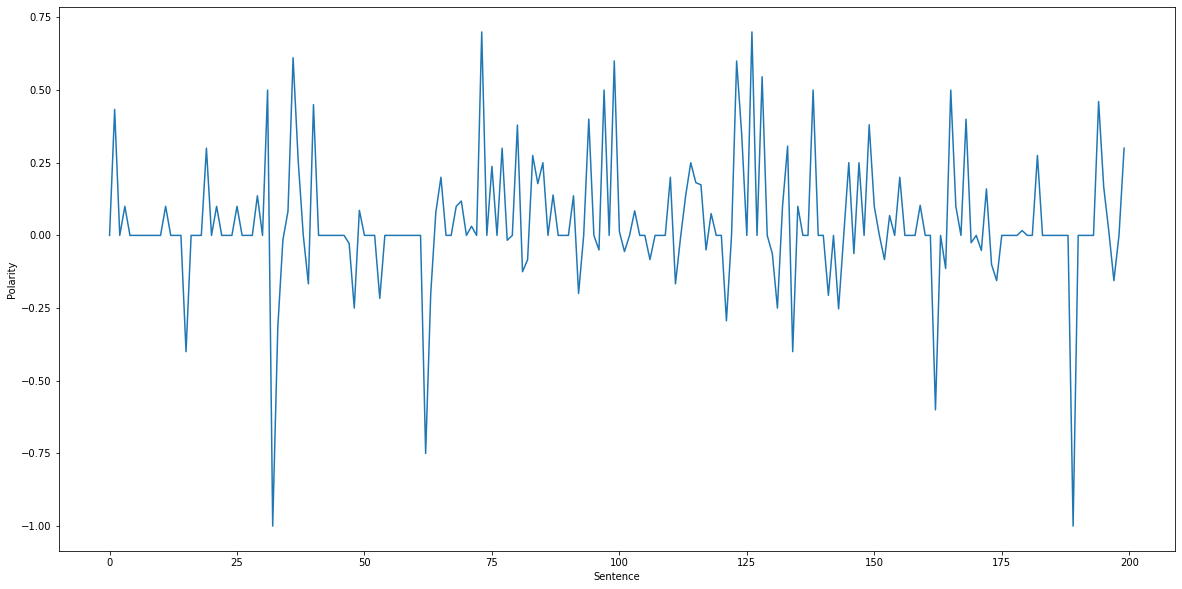

In [52]:
plt.figure().set_size_inches(20, 10)
plt.plot(sentiment_top_df['polarity'])
plt.xlabel('Sentence')
plt.ylabel('Polarity')
plt.show()

## Analyzing Tweets with Python

In [53]:
directory = 'https://storage.googleapis.com/msca-bdp-data-open/tweets/'
fileName = 'jeep_new.txt'

path = directory + fileName

tweets = pd.read_csv(path,sep='\t', names = ['id', 'lang', 'created_at', 'screen_name', \
                                                       'name', 'location', 'retweet_count', 'text'])

tweets = tweets.sample(n=1000)

In [54]:
pd.set_option('display.max_rows', 10)

In [55]:
pd.set_option('display.max_colwidth', 200)

In [56]:
tweets.head(5)

,id,lang,created_at,screen_name,name,location,retweet_count,text
62441,9.238896e+17,tl,Fri Oct 27 12:30:29 +0000 2017,itsmeroseeeeeee,l o s t,NaN,0.0,Nalaglag sa jeep yung liptint ko hayp 😭
9812,9.221154e+17,es,Sun Oct 22 15:00:22 +0000 2017,emirg_,E 🌻,Ciudad de México,0.0,Me desperté con muchas ganas de saltarme al día en el que me compre mi Jeep.
61686,9.217568e+17,en,Sat Oct 21 15:15:24 +0000 2017,el_marak,The Silang Marak,India,0.0,RT @Jeep: Get your morning miles in. 📷: @debtenator https://t.co/Y6P4dS0f2c
26762,9.238521e+17,tl,Fri Oct 27 10:01:18 +0000 2017,mjayd_,jay,LGN-ALBNG,0.0,@maicaloyz i was walking papuntang terminal ng jeep then pagsakay ko ng jeep bukas na bag ko :((((
36445,9.233378e+17,en,Wed Oct 25 23:57:37 +0000 2017,FourOneFool,April Jester,NaN,0.0,RT @lelandjohansen4: Did my first allignment today... on a Jeep.... holy fucking complicated....


In [57]:
tweets['lang'].value_counts()

en     591
tl     248
es      51
und     28
ja      24
      ... 
cy       1
ht       1
et       1
eu       1
nl       1
Name: lang, Length: 21, dtype: int64

In [58]:
# Filter non-English tweets
tweets_eng = tweets[tweets['lang']=='en'].reset_index(drop=True)

In [59]:
pd.set_option('display.max_colwidth', 50)

In [60]:
tweets_eng.head(5)

,id,lang,created_at,screen_name,name,location,retweet_count,text
0,9.217568e+17,en,Sat Oct 21 15:15:24 +0000 2017,el_marak,The Silang Marak,India,0.0,RT @Jeep: Get your morning miles in. 📷: @debte...
1,9.233378e+17,en,Wed Oct 25 23:57:37 +0000 2017,FourOneFool,April Jester,NaN,0.0,RT @lelandjohansen4: Did my first allignment t...
2,9.217544e+17,en,Sat Oct 21 15:05:38 +0000 2017,ZulhilmiHafiz,zh,NaN,0.0,RT @Jeep_Porn: This combo makes a Mean looking...
3,9.228842e+17,en,Tue Oct 24 17:55:05 +0000 2017,BrewbakerPrattv,Brewbaker Prattville,NaN,0.0,Rise and shine. #jeep #itsajeepthing #jeeplove...
4,9.232034e+17,en,Wed Oct 25 15:03:33 +0000 2017,rbramlett75443,Bramlett Motors,Hope AR,0.0,Take a glance at this 2017 Jeep Renegade! Now ...


In [61]:
# Count records 
len(tweets_eng)

591

In [62]:
# Remove special characters to avoid problems with analysis
tweets_eng['text_clean'] = tweets_eng['text'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))

In [63]:
pd.set_option('display.max_colwidth', 100)
tweets_eng[['text', 'text_clean']].head(5)

,text,text_clean
0,RT @Jeep: Get your morning miles in. 📷: @debtenator https://t.co/Y6P4dS0f2c,RT @Jeep: Get your morning miles in. : @debtenator https:t.coY6P4dS0f2c
1,RT @lelandjohansen4: Did my first allignment today... on a Jeep.... holy fucking complicated....,RT @lelandjohansen4: Did my first allignment today... on a Jeep.... holy fucking complicated....
2,RT @Jeep_Porn: This combo makes a Mean looking Jeep😈 https://t.co/QRr99J7vYF,RT @Jeep_Porn: This combo makes a Mean looking Jeep https:t.coQRr99J7vYF
3,Rise and shine. #jeep #itsajeepthing #jeeplove #jeeplife #wrangler #jeepwrangler #jeepfamily #OI...,Rise and shine. jeep itsajeepthing jeeplove jeeplife wrangler jeepwrangler jeepfamily OIIIIIIIO ...
4,"Take a glance at this 2017 Jeep Renegade! Now available, make it yours!: https://t.co/7cKpmGMKYw","Take a glance at this 2017 Jeep Renegade Now available, make it yours: https:t.co7cKpmGMKYw"


In [64]:
blob = TextBlob(tweets_eng['text_clean'].to_string())

In [65]:
blob[:1000]

TextBlob("0                                  RT @Jeep: Get your morning miles in. : @debtenator https:t.coY6P4dS0f2c
1         RT @lelandjohansen4: Did my first allignment today... on a Jeep.... holy fucking complicated....
2                                 RT @Jeep_Porn: This combo makes a Mean looking Jeep https:t.coQRr99J7vYF
3      Rise and shine. jeep itsajeepthing jeeplove jeeplife wrangler jeepwrangler jeepfamily OIIIIIIIO ...
4              Take a glance at this 2017 Jeep Renegade Now available, make it yours: https:t.co7cKpmGMKYw
5                                                        jeep dealership orangecounty https:t.coa8w939ejjn
6                                          Indian national dies in jeepbike collision https:t.coV5WNUijEAj
7      RT @floureedah: Only in d Philippinesa Korean star aka @alexander_0729  making sabit in the jeep...
8      Your car or part 3D Fits 20072015 Jeep Wrangler G3AC13639 Tan Waterproof Car Parts For Sale http...
9      Tu carro o parte 3D 

In [66]:
tags = TextBlob(tweets_eng['text_clean'].to_string()).tags

In [67]:
len(tags)

8868

In [68]:
#list all possible tags and values
#nltk.help.upenn_tagset('.*')

In [69]:
tags[:10]

[('0', 'CD'),
 ('RT', 'NNP'),
 ('@', 'JJ'),
 ('Jeep', 'NNP'),
 ('Get', 'VB'),
 ('your', 'PRP$'),
 ('morning', 'NN'),
 ('miles', 'NNS'),
 ('in', 'IN'),
 ('@', 'NN')]

In [70]:
pd.set_option('display.max_colwidth', 50)
tags_pd = pd.DataFrame(tags, columns={"Word","POS Tag"})
tags_pd

,Word,POS Tag
0,0,CD
1,RT,NNP
2,@,JJ
3,Jeep,NNP
4,Get,VB
...,...,...
8863,Matte,NNP
8864,Grey,NNP
8865,Jeep,NNP
8866,https,NN


In [71]:
nouns = TextBlob(tweets_eng['text_clean'].to_string()).noun_phrases

In [72]:
nouns[:100]

WordList(['rt', 'jeep', 'morning miles', '@ debten ...', 'rt', '@ lelandjohansen4', 'allignment t ...', 'rt', 'jeep_porn', 'mean', 'rise', 'jeeplove je ...', 'jeep renegade', 'jeep dealership orangecounty https', 'jeepbike collision htt ...', 'rt', '@ floureedah', 'philippinesa korean', 'your', 'part 3d', 'fits', 'jeep wrangle', 'tu', 'carro o parte 3d', 'fits', 'jeep wrangle', 'rt', '@ allparcom', 'jeep scrambler', 'riboflavinsheep', 'truestdragon', 'atco', 'rt', '@ offroadelements', 'england jeep', 'th', 'rt', '@ gulmeenay', 'jeep', 'amooca black powder coated', 'steel gas', 'fuel t', 'judaretro', '@ syfoexclusive', 'lol', 'e ne', 'hoseng r ...', 'happybirthday', 'amanda', 'brooks watson', 'apprentice automotive techniciansentry level t', 'rt', 'mailonline', 'jee ...', 'jeep wrangler', 'rt', 'jeepahoiics', 'matte', 'jeep', 't.co68 ...', 'jeep compass', 'driver side', 'small overlap', 'ii', 'tomsjku1', 'thejeepmafia', '@ rpx53 @', 'scooby_barkley', 'rt', 'jeep', 'ready', 'photo', 'jee

In [73]:
type(nouns)

textblob.blob.WordList

In [74]:
pd.set_option('display.max_colwidth', 200)
# The x in the lambda function is a row (because axis=1 is set)
# Apply iterates the function accross the dataframe's rows
tweets_eng['nouns'] = tweets_eng.apply(lambda x: TextBlob(x['text_clean']).noun_phrases, axis=1)
tweets_eng[['nouns']].head(5)

,nouns
0,"[rt, jeep, morning miles, @ debtenator https]"
1,"[rt, @ lelandjohansen4, jeep]"
2,"[rt, jeep_porn, mean, jeep]"
3,"[rise, jeeplove jeeplife wrangler jeepwrangler, oiiiiiiio]"
4,[jeep renegade]


In [75]:
tweets_eng['polarity'] = tweets_eng.apply(lambda x: TextBlob(x['text_clean']).sentiment.polarity, axis=1)
tweets_eng['subjectivity'] = tweets_eng.apply(lambda x: TextBlob(x['text_clean']).sentiment.subjectivity, axis=1)
tweets_eng[['text_clean', 'polarity', 'subjectivity']].head(5)

,text_clean,polarity,subjectivity
0,RT @Jeep: Get your morning miles in. : @debtenator https:t.coY6P4dS0f2c,0.0000,0.000000
1,RT @lelandjohansen4: Did my first allignment today... on a Jeep.... holy fucking complicated....,-0.1250,0.666667
2,RT @Jeep_Porn: This combo makes a Mean looking Jeep https:t.coQRr99J7vYF,-0.3125,0.687500
3,Rise and shine. jeep itsajeepthing jeeplove jeeplife wrangler jeepwrangler jeepfamily OIIIIIIIO https:t.coNi9rGauvjd,0.0000,0.000000
4,"Take a glance at this 2017 Jeep Renegade Now available, make it yours: https:t.co7cKpmGMKYw",0.4000,0.400000


In [76]:
tweets_eng[['text_clean', 'polarity', 'subjectivity']][tweets_eng['polarity'] > 0.6].head(5)

,text_clean,polarity,subjectivity
12,"He lost at Atco today, so I let him drive my Jeep Thats LOVE LOL JeepMafia https:t.coc4LbaPdKHE",0.65,0.65
16,"@JudaRetro @syfoexclusive Lol e ne le hoseng re buoa ka the people in the jeep tops, ba ne ba shebile Lebohang",0.80,0.70
89,RT @wsl: .@Jeep Leader @johnjohnflorenc has the opportunity to win the World Title in Portugal MEORipCurlPro https:t.coohN8JWavuk,0.80,0.40
117,RT @wsl: .@Jeep Leader @johnjohnflorenc has the opportunity to win the World Title in Portugal MEORipCurlPro https:t.coohN8JWavuk,0.80,0.40
139,"eBay: 2012 Jeep Wrangler Sahara Jeep Wrangler Bright Silver Metallic with 51,217 Miles, Lots of https:t.co7C5CApMrdI",0.70,0.80


In [77]:
tweets_eng[['text_clean', 'polarity', 'subjectivity']][tweets_eng['polarity'] < -0.6].head(5)

,text_clean,polarity,subjectivity
262,Jeep is bad. I wont lie. https:t.cotjr5SgPSe6,-0.7,0.666667


## Word dictionary-based sentiment analysis

In [78]:
# Read in the corpus of positive/negative words compiled by University of Pittsburgh, available at UNC Chapel Hill websie
# These came from researchers Theresa Wilson, Janyce Wiebe, and Paul Hoffmann at the University of Pittsburgh, 
# and were readily available at http://mpqa.cs.pitt.edu/

#Code adopted from: http://nealcaren.web.unc.edu/an-introduction-to-text-analysis-with-python-part-3/

from urllib.request import urlretrieve
import urllib

directory = '/home/jupyter/data/tweets/'
file_pos = 'positive.txt'
file_neg = 'negative.txt'

In [79]:
tweet_list = tweets_eng['text_clean'].tolist()

In [80]:
pos_sent = open(directory +file_pos).read()
pos_words = pos_sent.split('\n')
neg_sent = open(directory +file_neg).read()
neg_words = neg_sent.split('\n')

In [81]:
# customize the dictionaries by adding and removing your own positive and negative words and get some counts

pos_add = ['your_pos_term_1, your_pos_term_2']

for term in pos_add:
    pos_words.append(term)

neg_add = ['your_neg_term_1, your_neg_term_2']

for term in neg_add:
    neg_words.append(term)

import re
from string import punctuation
# from __future__ import division  

sentiment_scores=[]
for tweet in tweet_list:
    sentiment_score=0
    for p in list(punctuation):
        tweet=tweet.replace(p,'')
        words=tweet.split(' ')
    for word in words:
        word = word.lower()
        if word in pos_words:
            sentiment_score=sentiment_score+1
        if word in neg_words:
            sentiment_score=sentiment_score-1
    sentiment_scores.append(sentiment_score/len(words))

tweet_sentiment=zip(tweet_list,sentiment_scores)

In [82]:
# Create a dataframe from the results
column_names = ["Text", "Sentiment_Score"]
sentiment_results = [tweet_list, sentiment_scores]
results_dict = dict(zip(column_names,sentiment_results))
all_tweets_df = pd.DataFrame.from_dict(results_dict, orient='columns')
all_tweets_df = all_tweets_df[column_names]   # set specific column order

In [83]:
# Create a list to store the sentiments
sent_list = []

# For each row in the column,
for row in all_tweets_df['Sentiment_Score']:
    if row > 0:
        sent_list.append('Positive')
    elif row < 0:
        sent_list.append('Negative')
    else:
        sent_list.append('Neutral')

# Create a column from the list
all_tweets_df['Sentiment_Label'] = sent_list

In [84]:
#Make sure I didn't loose any records
len(tweet_list) - len(all_tweets_df)

0

In [85]:
all_tweets_df.sample(frac=0.1, replace=False, random_state=123).head(10)

,Text,Sentiment_Score,Sentiment_Label
528,Thanks to @kanturkprinters for the great job on the Waterpower Jeep superefficientservice . Good to support one https:t.co4HNzxwo5QR,0.150000,Positive
54,Jeep Compass Night Eagle revealed Autocar India https:t.cozn0655v2jz,0.000000,Neutral
512,I dont ask for much. but I am asking that we get this jeep.,0.000000,Neutral
192,20122017 Jeep Wrangler 3.6L 409S Stainless Steel Exhaust System https:t.cowNSdE0jgKj https:t.coHnP1Mey8aL,0.090909,Positive
415,RT @Jeep: Livin the dream. Photo credit: @braceythedog https:t.co6PAvBSHjzp,0.111111,Positive
490,@Jeep This steering wheel is laughing at you. Your argument is invalid,-0.166667,Negative
35,@andrewjbullock @Jeep Bunch of turds,0.000000,Neutral
362,RT @CTVSarah: .@LangleyRCMP are investigating after this burned Jeep was found on 204th overnight. No known link to the Surrey s,0.000000,Neutral
347,@JoshuaRHVargas honestly yeah they have to its a weird country. environment will benefit although the economic ef https:t.covbkH5M40Jn,0.100000,Positive
582,Man Dies In Jeep Plunge https:t.coxufVR2UBIm,0.000000,Neutral


In [86]:
#all_tweets_df['Sentiment_Label'].value_counts()

Neutral     300
Positive    176
Negative    115
dtype: int64


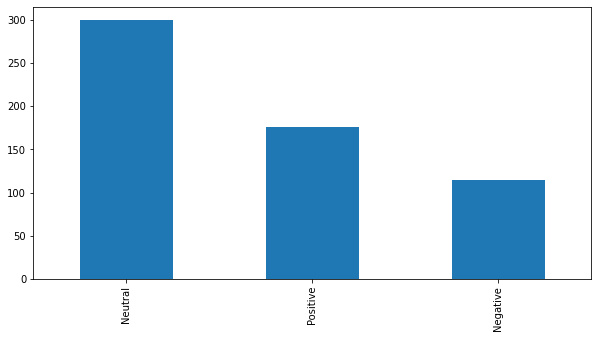

In [87]:
plt.figure().set_size_inches(10, 5)

CountSentiment = pd.value_counts(all_tweets_df['Sentiment_Label'].values, sort=True)
print (CountSentiment)

#CountStatus.plot.barh()
CountSentiment.plot.bar()
plt.show()

#### Export the results of dictionary-based sentiment analysis

In [88]:
# !pip install openpyxl

In [89]:
# writer = pd.ExcelWriter(directory+'jeep_adv_sentiment.xlsx', engine='xlsxwriter')

writer = pd.ExcelWriter(directory+'jeep_adv_sentiment.xlsx')

all_tweets_df.to_excel(writer, sheet_name='Tweets_Sentiment')
writer.save()

In [90]:
!ls -l /home/jupyter/data/tweets/*.xlsx

-rw-r--r-- 1 root root 44513 Oct 22 20:38 /home/jupyter/data/tweets/jeep_adv_sentiment.xlsx


In [91]:
import datetime
import pytz

datetime.datetime.now(pytz.timezone('US/Central')).strftime("%a, %d %B %Y %H:%M:%S")

'Sat, 22 October 2022 15:38:43'